# Apprentissage Supervisé - Classification

*Lorenzo Brucato - Alexandre Loret*
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# fonctions pour la regression
from ClfFunctions import *

## 1. Chargement, pré traitement des données et visualisation

In [2]:
train = pd.read_csv("data/train.csv").drop(['Unnamed: 0'], axis=1) # jeu de données d'entrainement
test = pd.read_csv("data/test.csv").drop(["row_ID"],axis=1)

In [3]:
n, p = train.shape
print(n, p) # 100000 données d'entrainement pour 55 variables

100000 55


### 1.1 Valeurs manquantes

Pas de valeurs manquantes dans les données :

In [4]:
print(pd.isna(train).sum().sum())
print(pd.isna(test).sum().sum())

0
0


In [5]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

### 1.2 Analyse des variables explicatives

**Description des variables :**

*Variables explicatives :* 
- `Elevation` : elevation en mètres
- `Aspect` : aspect (en degrés azimuth)
- `Slope` : degré de pente (en degré)
- `Horizontal_Distance_To_Hydrology` : distance horizontale à la source d'eau la plus proche
- `Vertical_Distance_To_Hydrology` : distance vertical à la source d'eau la plus proche
- `Horizontal_Distance_To_Roadways` : distance horizontale à la route la plus proche
- `Hillshade_9am` : ombre de relief (9h du matin)
- `Hillshade_Noon` : ombre de relief (midi)
- `Hillshade_3pm` : ombre de relief (3h de l'après-midi)
- `Horizontal_Distance_To_Fire_Points` : distance horizontale au départ d'incendie de forêt le plus porche
- `Wilderness_AreaX` : type naturel (4 modalités, 0:absence, 1:presence)
- `Soil_typeX` : type de sol (40 modalités, 0:absence, 1:presence)

*Variable cible :*
- `Cover_type` : type de forêt (7 modalités, 1:Spruce, 2:Lodgepole Pine, 3:Ponderosa Pine, 4:Cottonwood/Willow, 5:Aspen, 6:Douglas-fir, 7:Krummholz)

#### 1.2.1 Description des variables et valeurs aberrantes

In [6]:
train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2959.215150,155.551260,14.122850,269.605630,46.821590,2350.361130,212.103800,223.348670,142.585660,1976.436530,...,0.090250,0.079220,0.002800,0.003080,0.000200,0.000570,0.027890,0.024050,0.015440,2.054180
std,280.832825,111.759698,7.507368,212.770595,58.689319,1560.499103,26.841126,19.756411,38.459542,1324.925172,...,0.286541,0.270083,0.052841,0.055412,0.014141,0.023868,0.164658,0.153205,0.123295,1.398794
min,1860.000000,0.000000,0.000000,0.000000,-161.000000,0.000000,0.000000,42.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,59.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1020.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1992.000000,218.000000,226.000000,143.000000,1704.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3331.250000,231.000000,237.000000,169.000000,2549.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,62.000000,1383.000000,598.000000,7078.000000,254.000000,254.000000,254.000000,7126.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
test.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,...,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000,481012.000000
mean,2959.396516,155.678750,14.099723,269.391333,46.335129,2350.102014,212.154832,223.312489,142.516330,1981.092599,...,0.044242,0.090422,0.077403,0.002767,0.003291,0.000206,0.000501,0.026577,0.023702,0.014981
std,279.808380,111.945819,7.484261,212.503535,58.212679,1558.997695,26.755075,19.771265,38.235983,1324.043373,...,0.205633,0.286785,0.267231,0.052530,0.057273,0.014345,0.022378,0.160845,0.152120,0.121476
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,29.000000,1998.000000,218.000000,226.000000,143.000000,1711.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,261.000000,18.000000,384.000000,69.000000,3327.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1.2.2 Variables catégorielles et variables supplémentaires

Les variables catégorielles sont déjà mises sous forme de one-hot-vector encoding.
Supression de la première colonne de wilderness_area afin de régler des problèmes d'identifiabilité.
Pour les Soil_types, on laisse pour le moment l'intégralité des colonnes en vu de pouvoir réaliser une AFC et réduction par KMean par la suite.

In [8]:
train = train.drop('Wilderness_Area1', axis=1)
test = test.drop('Wilderness_Area1', axis=1)

Ajout de variable à partir de celles déjà données : conversion des angles en coordonnées (cos/sin)

In [9]:
train['Aspect_Sin'] = np.sin(train['Aspect']*(2*np.pi/360))
train['Aspect_Cos'] = np.cos(train['Aspect']*(2*np.pi/360))

test['Aspect_Sin'] = np.sin(test['Aspect']*(2*np.pi/360))
test['Aspect_Cos'] = np.cos(test['Aspect']*(2*np.pi/360))

In [10]:
train['Slope_Sin'] = np.sin(train['Slope']*(2*np.pi/360))
train['Slope_Cos'] = np.cos(train['Slope']*(2*np.pi/360))

test['Slope_Sin'] = np.sin(test['Slope']*(2*np.pi/360))
test['Slope_Cos'] = np.cos(test['Slope']*(2*np.pi/360))

In [11]:
train['Vertical_Distance_To_Hydrology2'] = train['Vertical_Distance_To_Hydrology']**2
test['Vertical_Distance_To_Hydrology2'] = test['Vertical_Distance_To_Hydrology']**2

In [12]:
train['Hillshade_radial'] = np.sqrt(train['Hillshade_9am']**2 + train['Hillshade_3pm']**2)
train['Hillshade_angle'] = np.arctan2(train['Hillshade_9am'], train['Hillshade_3pm'])
train['Hillshade_diff1'] = train['Hillshade_Noon'] - train['Hillshade_9am']
train['Hillshade_diff2'] = train['Hillshade_3pm'] - train['Hillshade_Noon']

test['Hillshade_radial'] = np.sqrt(test['Hillshade_9am']**2 + test['Hillshade_3pm']**2)
test['Hillshade_angle'] = np.arctan2(test['Hillshade_9am'], test['Hillshade_3pm'])
test['Hillshade_diff1'] = test['Hillshade_Noon'] - test['Hillshade_9am']
test['Hillshade_diff2'] = test['Hillshade_3pm'] - test['Hillshade_Noon']

#### 1.2.3 Distribution de la classe cible

(array([36410., 48676.,     0.,  6273.,     0.,   471.,  1635.,     0.,
         2967.,  3568.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

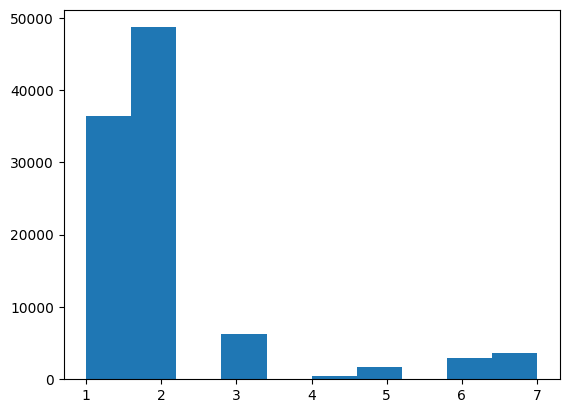

In [17]:
plt.hist(train['Cover_Type'])

In [18]:
size = []
for i in range(1,8):
    size.append(len(train.loc[train['Cover_Type'] == i]))
size

[36410, 48676, 6273, 471, 1635, 2967, 3568]

On remarque que les classe 3, 4, 5, 6 et 7 sont très peu représentées en comparaison des classes majoritaires 1 et 2.
On décide de réequilibrer légèrement les données en dupliquant des données des classes minoritaires selon les tailles d'échantillons suivantes (choisies de manière raisonnable à partir de la distribution initiale ci-dessus) :

In [22]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(
    random_state=42,
    sampling_strategy = {
        3:10000,
        4:5000,
        5:5000,
        6:10000,
        7:10000
    }
)
balance_train = pd.concat(smote.fit_resample(train.drop('Cover_Type', axis=1), train['Cover_Type']), axis=1)

In [23]:
Xtrain = balance_train.drop('Cover_Type', axis=1)
Ytrain = balance_train['Cover_Type']

### 1.3 Visualisation

**Matrice de correlation :**

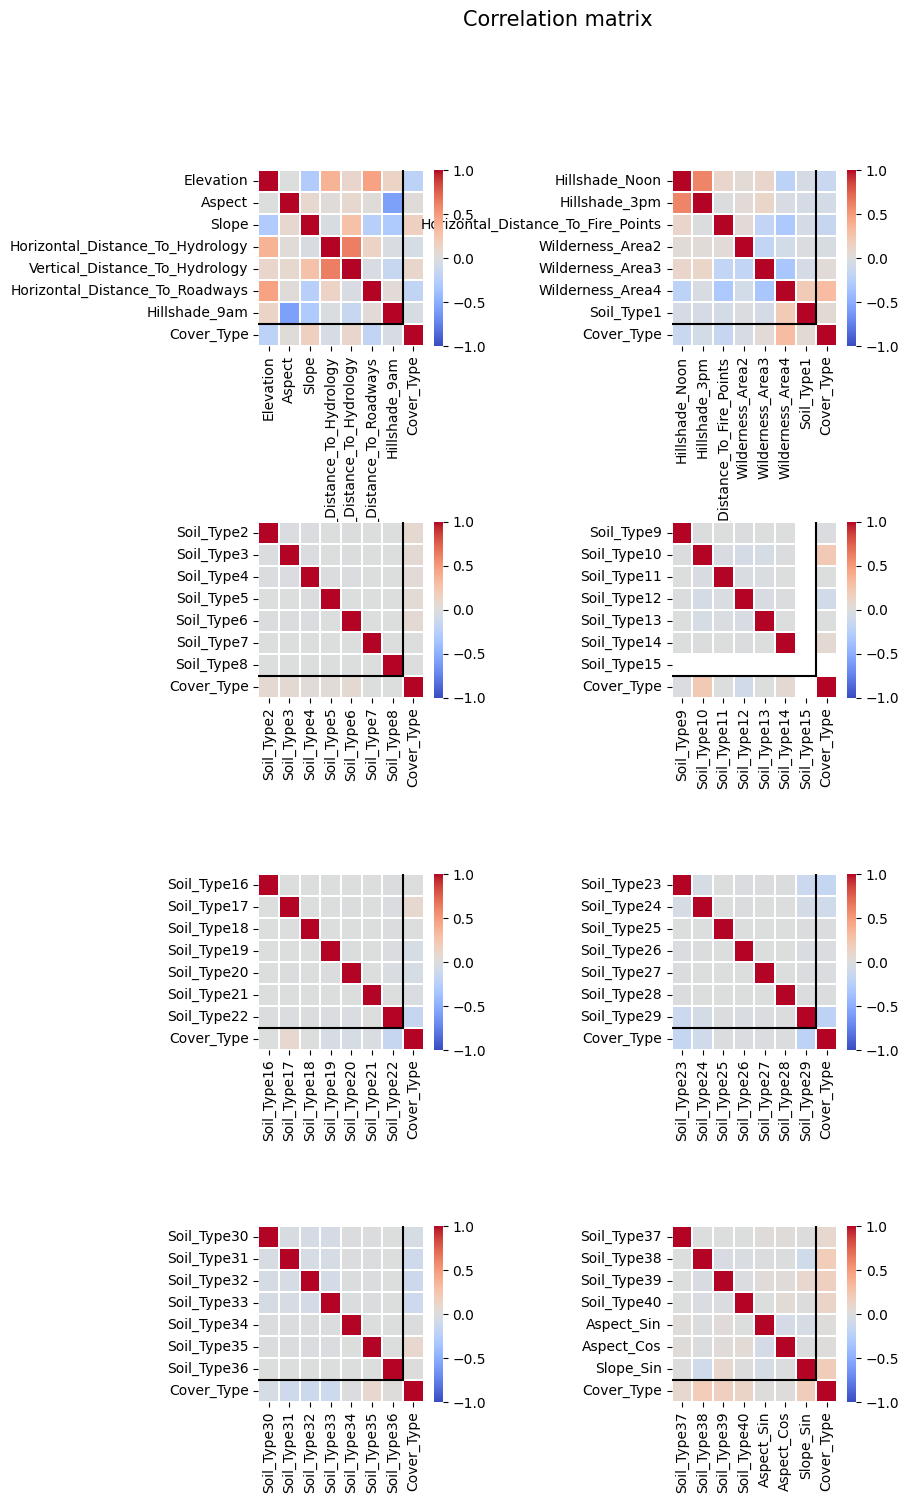

In [24]:
corrplot(balance_train, 'Cover_Type')

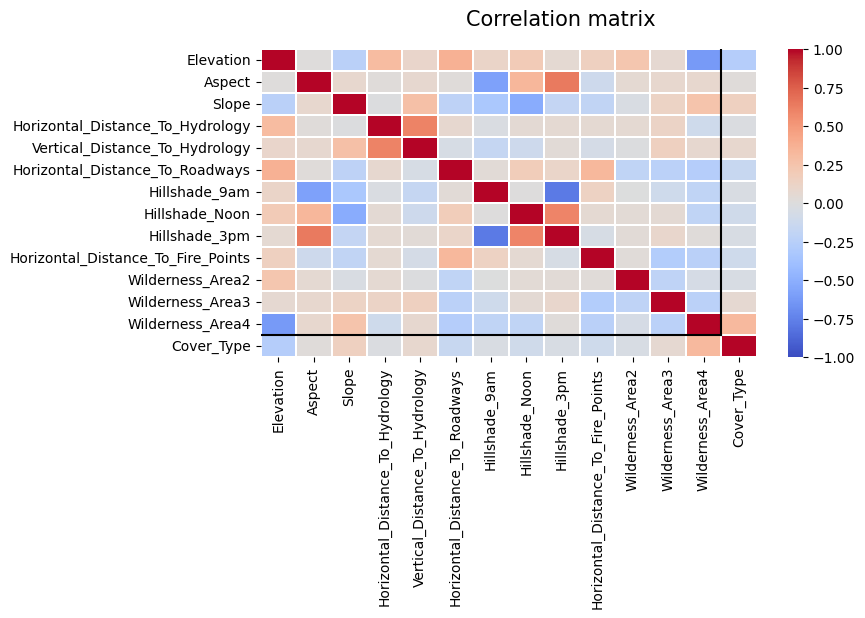

In [39]:
corrplot(train.drop(train.columns[13:-10],axis=1), 'Cover_Type', num_cols=13,mt_width=1)

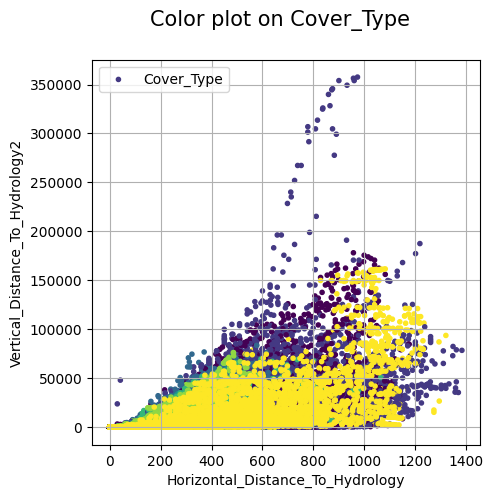

In [40]:
colorScatterPlot('Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology2', 'Cover_Type', balance_train)

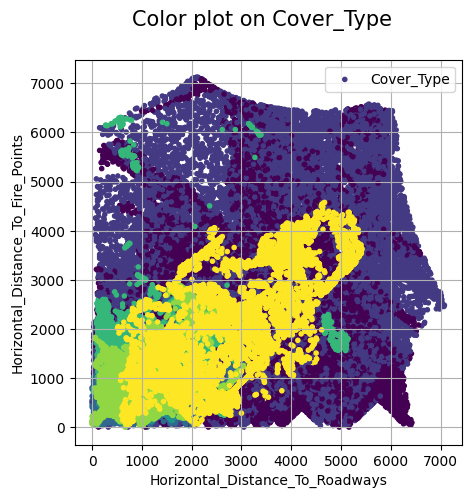

In [41]:
colorScatterPlot('Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type', balance_train)

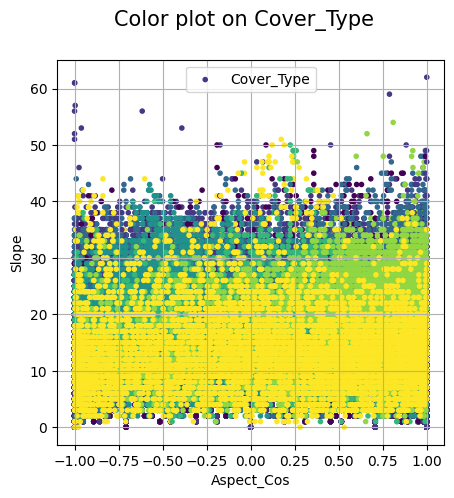

In [42]:
colorScatterPlot('Aspect_Cos', 'Slope', 'Cover_Type', balance_train)

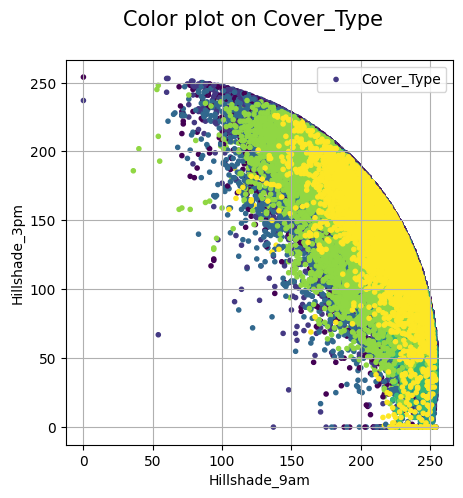

In [43]:
colorScatterPlot('Hillshade_9am', 'Hillshade_3pm', 'Cover_Type', balance_train)

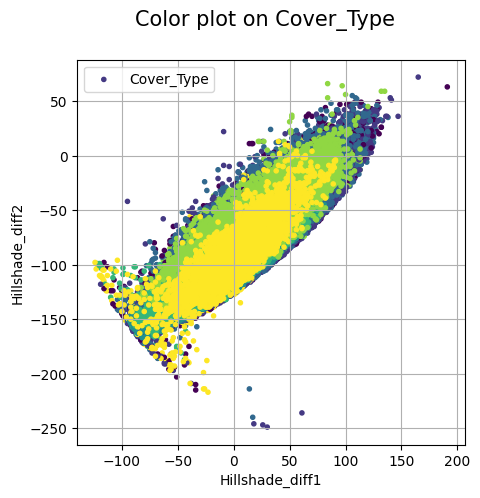

In [44]:
colorScatterPlot('Hillshade_diff1', 'Hillshade_diff2', 'Cover_Type', balance_train)

## 2. Analyse des modèles prédictifs

**Métriques de mesure de performance et recherche d'hyperparamètres par validation croisée :**

In [47]:
# recherche d'hyperparamètres par validation croisée
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

scoring = {
    'f1_weighted': make_scorer(f1_score, greater_is_better=True, average='weighted'),
    'f1_macro': make_scorer(f1_score, greater_is_better=True, average='macro'),
}

**Train, test split et standardisation des données :**

In [48]:
# Xtrain, Ytrain = train.drop(['Cover_Type'], axis=1), balance_train['Cover_Type'] # données classiques
Xtrain, Ytrain = balance_train.drop(['Cover_Type'], axis=1), balance_train['Cover_Type'] # données avec suréchantillonage
Xtest = test.copy()

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Extraction d'un mini jeu de données pour validation :**

In [50]:
from sklearn.utils import shuffle 

rs = 42
size_cover_type = 200
train_indexs = []

for cover_type in range(1, 8):
    train_indexs += list(Ytrain[Ytrain == cover_type][:size_cover_type].index)

sub_Xtrain = shuffle(Xtrain.iloc[train_indexs].reset_index(drop=True), random_state = rs)
sub_Ytrain = shuffle(Ytrain.iloc[train_indexs].reset_index(drop=True), random_state = rs)

### 2.1 Reduction de dimension sur les types de sols (AFC et KMeans clustering) 
(a utiliser uniquement si méthodes trop lourdes)

Au vu du nombre important de variables de type pour les sols, on décide de réduire la dimensionalité des données sur l'ensemble de ces variables. On cherche ainsi à visualiser et projeter les profils de sols qui présentent des similarités relativement à la variable cible (AFC) et à former un nombre restreint de clusters.

Cela permettra de simplifier le jeu de données, de limiter le surapprentissage et de pouvoir utiliser des méthodes de classification plus couteuses en ressources (Random Forest, SVM)

In [54]:
import prince

In [55]:
soil_features = [name for name in Xtrain.columns if 'Soil_Type' in name]
soil_cover_df = pd.concat((Xtrain[soil_features], Ytrain), axis=1)

conting = pd.DataFrame({
    i:soil_cover_df.loc[soil_cover_df['Cover_Type'] == i].sum() for i in range(1,8)
}).drop('Cover_Type')

conting = conting.drop('Soil_Type15') # problème d'identifiabilité : pas de soil_type15 dans le jeu train --> suppression
conting

,1,2,3,4,5,6,7
Soil_Type1,0,0,442,135,0,201,0
Soil_Type2,0,129,1160,93,90,440,0
Soil_Type3,0,214,511,1364,0,45,0
Soil_Type4,24,536,1694,92,193,172,5
Soil_Type5,0,0,178,45,0,147,0
Soil_Type6,0,152,881,207,0,376,0
Soil_Type7,0,16,0,0,0,0,0
Soil_Type8,2,34,0,0,0,0,0
Soil_Type9,33,172,0,0,0,0,0
Soil_Type10,161,1816,2683,154,70,4099,0


In [56]:
ca = prince.CA(n_components=5)
ca = ca.fit(conting)

In [57]:
ca.eigenvalues_summary


,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.748,40.79%,40.79%
1,0.477,26.03%,66.82%
2,0.330,18.02%,84.85%
3,0.119,6.49%,91.33%
4,0.107,5.85%,97.18%


In [58]:
import warnings
warnings.filterwarnings('ignore')

ca.plot(
    conting,
    x_component=0,
    y_component=1,
    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=False,
    show_column_labels=True,
)

alt.LayerChart(...)

In [59]:
from sklearn.cluster import KMeans
k = 12
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(ca.row_coordinates(conting))

KMeans(n_clusters=12, random_state=42)

In [60]:
clusters = ca.row_coordinates(conting).copy()
clusters['cluster'] = kmeans.fit_predict(ca.row_coordinates(conting))
clusters

,0,1,2,3,4,cluster
Soil_Type1,2.334962,0.446554,0.010909,0.328344,0.445654,2
Soil_Type2,2.015663,0.278501,-0.675205,0.207492,0.794919,11
Soil_Type3,2.334214,0.595330,3.377443,0.070570,-0.126100,3
Soil_Type4,1.643616,0.147473,-0.481765,0.105270,1.376094,11
Soil_Type5,2.266024,0.394917,-0.438648,0.253687,-0.126961,2
Soil_Type6,2.080524,0.333191,-0.179516,0.250120,0.520525,2
Soil_Type7,-0.257134,-0.625609,0.028233,-0.718759,0.084905,7
Soil_Type8,-0.273995,-0.591538,0.031957,-0.607869,0.073253,7
Soil_Type9,-0.305990,-0.526887,0.039022,-0.397448,0.051144,7
Soil_Type10,1.606448,0.108788,-0.952006,-0.010142,-0.620608,10


Text(0.5, 0.98, '12-KMeans clustering sur les projections ACM des types de sols relatifs aux types de forêt')

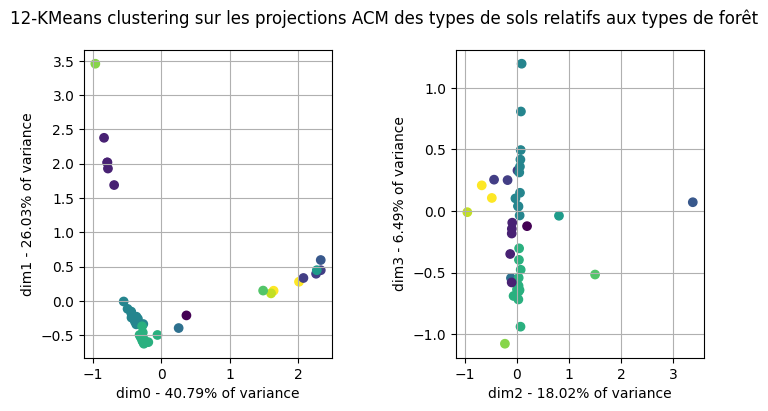

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].grid()
axs[0].set_xlabel(f"dim0 - {ca.eigenvalues_summary['% of variance'][0]} of variance")
axs[0].set_ylabel(f"dim1 - {ca.eigenvalues_summary['% of variance'][1]} of variance")
axs[0].scatter(clusters[0], clusters[1], c=clusters['cluster'])

axs[1].grid()
axs[1].set_xlabel(f"dim2 - {ca.eigenvalues_summary['% of variance'][2]} of variance")
axs[1].set_ylabel(f"dim3 - {ca.eigenvalues_summary['% of variance'][3]} of variance")
axs[1].scatter(clusters[2], clusters[3], c=clusters['cluster'])

fig.subplots_adjust(wspace=0.5)
fig.suptitle(f"{k}-KMeans clustering sur les projections ACM des types de sols relatifs aux types de forêt")

**Regroupement des sols sur jeu d'entrainement et test :**

In [62]:
mapping = clusters['cluster'].to_dict()

fact_Xtrain = pd.DataFrame(0, index = Xtrain[soil_features].index, columns = [f'soil_group{i}' for i in range(k)])
for col in soil_features:
    if col != 'Soil_Type15' :
        groupe = mapping[col]
        fact_Xtrain[f'soil_group{groupe}'] += Xtrain[col]

fact_Xtest = pd.DataFrame(0, index = Xtest[soil_features].index, columns = [f'soil_group{i}' for i in range(k)])
for col in soil_features:
    if col != 'Soil_Type15' :
        groupe = mapping[col]
        fact_Xtest[f'soil_group{groupe}'] += Xtest[col]

fact_Xtrain = pd.concat( (Xtrain.drop(soil_features, axis=1), fact_Xtrain), axis=1)
fact_Xtest = pd.concat( (Xtest.drop(soil_features, axis=1), fact_Xtest), axis=1)

# suppression du groupe 0 (identifiabilité par les autres groupes) : 
# --> fusion avec quelques données de test (3) de soil_type15 pour lesquelles il n'y a pas d'exemplaires sur le train_set
fact_Xtrain = fact_Xtrain.drop('soil_group0', axis=1)
fact_Xtest = fact_Xtest.drop('soil_group0', axis=1)

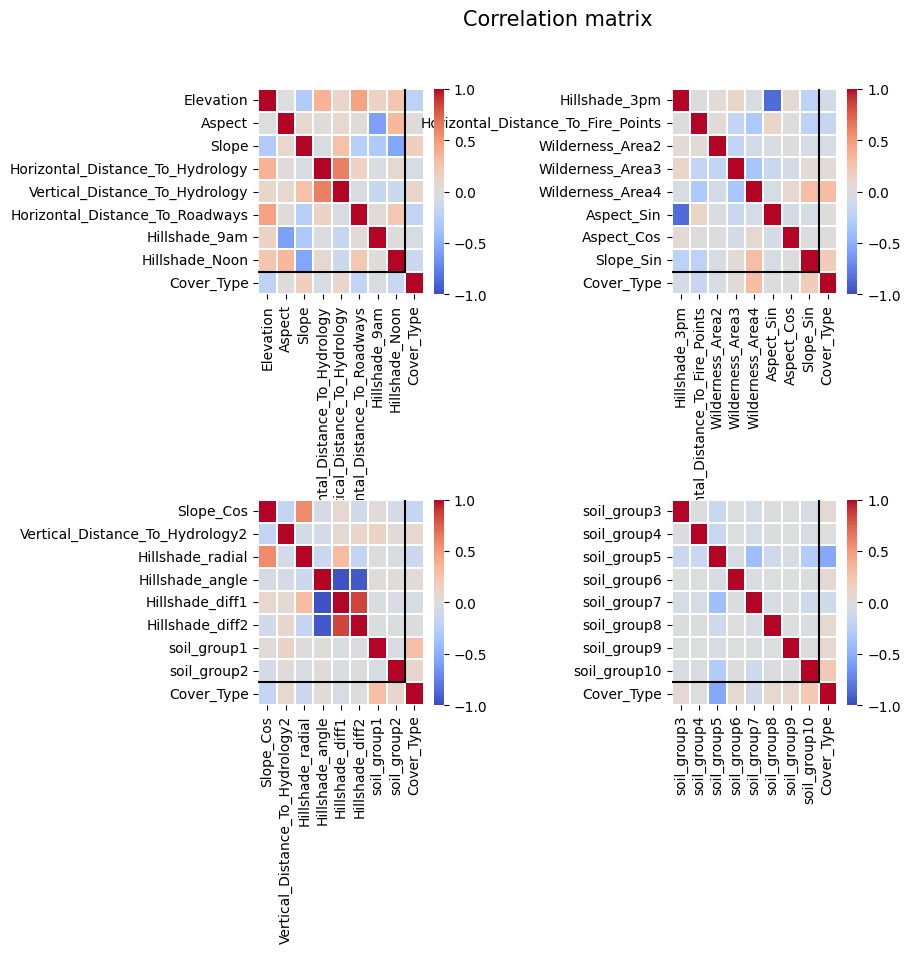

In [65]:
corrplot(pd.concat((fact_Xtrain, Ytrain), axis=1), 'Cover_Type',num_cols=8)

### 2.1 Regression logistique

In [66]:
from sklearn.linear_model import LogisticRegression

LogitModel = LogisticRegression(max_iter=1000)

Logit_CV = GridSearchAnalysis(LogitModel, scaler.fit_transform(Xtrain), Ytrain, scoring)


KeyboardInterrupt



In [ ]:
Logit_CV.score_table()

### 2.2 Arbres

In [68]:
from sklearn.tree import DecisionTreeClassifier

TreeModel = DecisionTreeClassifier()

param_grid = {
    "max_depth":[10,30,50,70,100]
}

Tree_CV = GridSearchAnalysis(TreeModel, Xtrain, Ytrain, scoring, param_grid=param_grid)

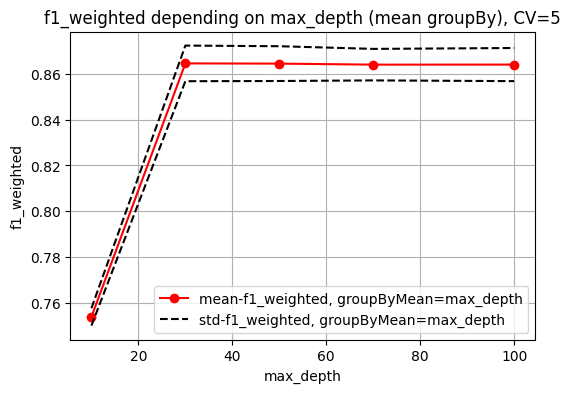

In [69]:
Tree_CV.plot_score(groupBy='max_depth')

In [70]:
Tree_CV.score_table()

,max_depth,fit_time,f1_weighted,f1_macro
0,10,2.382 ± 0.209,0.754 ± 0.004,0.746 ± 0.007
1,30,4.606 ± 0.382,0.865 ± 0.008,0.878 ± 0.011
2,50,4.337 ± 0.318,0.864 ± 0.008,0.878 ± 0.011
3,70,4.447 ± 0.698,0.864 ± 0.007,0.878 ± 0.011
4,100,3.438 ± 0.131,0.864 ± 0.007,0.877 ± 0.011


In [71]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

TreeModel = DecisionTreeClassifier(max_depth=30)
TreeModel.fit(Xtrain, Ytrain)

print(export_text(TreeModel,feature_names=test.columns,max_depth=3))

|--- Elevation <= 2602.50
|   |--- Horizontal_Distance_To_Hydrology <= 29.50
|   |   |--- Wilderness_Area4 <= 0.50
|   |   |   |--- Horizontal_Distance_To_Fire_Points <= 3010.50
|   |   |   |   |--- truncated branch of depth 22
|   |   |   |--- Horizontal_Distance_To_Fire_Points >  3010.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- Wilderness_Area4 >  0.50
|   |   |   |--- Soil_Type10 <= 0.50
|   |   |   |   |--- truncated branch of depth 27
|   |   |   |--- Soil_Type10 >  0.50
|   |   |   |   |--- truncated branch of depth 10
|   |--- Horizontal_Distance_To_Hydrology >  29.50
|   |   |--- Aspect_Cos <= 0.16
|   |   |   |--- Elevation <= 2362.50
|   |   |   |   |--- truncated branch of depth 19
|   |   |   |--- Elevation >  2362.50
|   |   |   |   |--- truncated branch of depth 19
|   |   |--- Aspect_Cos >  0.16
|   |   |   |--- Elevation <= 2486.50
|   |   |   |   |--- truncated branch of depth 27
|   |   |   |--- Elevation >  2486.50
|   |   |   |   |--- truncated 

### 2.3 Random Forest

**Sur l'ensemble des données :**

In [374]:
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier()

param_grid = {
    
    'n_estimators': [50],                            # Nombre d'arbres dans la forêt
    'max_depth': [45, 50, 55, 60],             # Profondeur maximale de l'arbre
    'min_samples_leaf':[1],
    'bootstrap':[False]                               # bootstrapping des échantillons
 
}

RF_CV1 = GridSearchAnalysis(RFModel, scaler.fit_transform(Xtrain), Ytrain, scoring, param_grid=param_grid, n_folds=5)

In [376]:
RF_CV1.score_table()

,n_estimators,max_depth,min_samples_leaf,bootstrap,fit_time,f1_weighted,f1_macro
0,50,45,1,False,21.798 ± 1.876,0.905 ± 0.009,0.921 ± 0.015
1,50,50,1,False,21.358 ± 1.158,0.905 ± 0.008,0.921 ± 0.014
2,50,55,1,False,20.675 ± 0.361,0.907 ± 0.010,0.922 ± 0.016
3,50,60,1,False,21.558 ± 0.450,0.906 ± 0.009,0.922 ± 0.015


In [201]:
RF_CV1.score_table()

,n_estimators,max_depth,min_samples_leaf,bootstrap,fit_time,f1_weighted,f1_macro
0,50,30,1,False,19.536 ± 4.912,0.911 ± 0.007,0.928 ± 0.010
1,50,35,1,False,18.719 ± 0.782,0.911 ± 0.009,0.929 ± 0.011
2,50,40,1,False,18.851 ± 0.616,0.912 ± 0.009,0.930 ± 0.011
3,50,45,1,False,18.179 ± 0.219,0.912 ± 0.007,0.930 ± 0.010


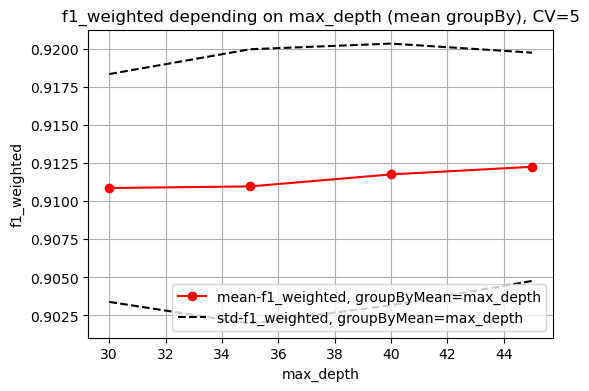

In [205]:
RF_CV1.plot_score(groupBy='max_depth')

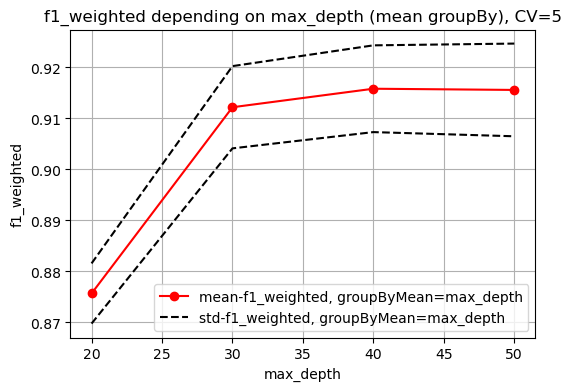

In [942]:
RF_CV1.plot_score(groupBy='max_depth')

In [378]:
# Importance des variables (sur les meilleurs hyperparamètres)
RFModel = RandomForestClassifier(max_depth = 55, n_estimators = 100, min_samples_split=2, bootstrap=False)

RFModel.fit(scaler.fit_transform(Xtrain), Ytrain)

importances = RFModel.feature_importances_
feature_names = Xtrain.columns

# Créer un DataFrame pour l'importance des variables
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

In [386]:
feature_importances.head(40)

,feature,importance
0,Elevation,0.211386
5,Horizontal_Distance_To_Roadways,0.087611
9,Horizontal_Distance_To_Fire_Points,0.077597
3,Horizontal_Distance_To_Hydrology,0.048813
12,Wilderness_Area4,0.043455
4,Vertical_Distance_To_Hydrology,0.037771
57,Vertical_Distance_To_Hydrology2,0.036926
54,Aspect_Cos,0.029118
58,Hillshade_radial,0.027000
1,Aspect,0.024247


In [388]:
# on conserve les variables de plus grande importance ainsi que seulement quelques variables explicatives non corrélées (les plus importantes)
keep = ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 
        'Vertical_Distance_To_Hydrology', 'Aspect_Cos', 'Wilderness_Area4', 'Hillshade_radial', 'Hillshade_angle', 'Hillshade_diff1',
        'Hillshade_diff2', 'Slope_Cos', 'Slope_Sin', 'Wilderness_Area3', 'Wilderness_Area2', 'Soil_Type38', 'Soil_Type10', 'Soil_Type22', 'Soil_Type39', 
        'Soil_Type29', 'Soil_Type12', 'Soil_Type23', 'Soil_Type4', 'Soil_Type2', 'Soil_Type32', 'Soil_Type33']

**Sur l'ensemble des données et les variables d'importance >= 0.01**

In [391]:
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier(n_jobs=-1)

param_grid = {
    
    'n_estimators': [50],                            # Nombre d'arbres dans la forêt
    'max_depth': [30, 40, 50, 60],             # Profondeur maximale de l'arbre
    'min_samples_split':[2],
    'bootstrap':[False]                               # bootstrapping des échantillons
 
}

RF_CV11 = GridSearchAnalysis(RFModel, scaler.fit_transform(Xtrain[keep]), Ytrain, scoring, param_grid=param_grid, n_folds=5)

In [395]:
RF_CV11.score_table()

,n_estimators,max_depth,min_samples_split,bootstrap,fit_time,f1_weighted,f1_macro
0,50,30,2,False,2.421 ± 0.069,0.924 ± 0.005,0.935 ± 0.010
1,50,40,2,False,2.515 ± 0.071,0.925 ± 0.006,0.936 ± 0.010
2,50,50,2,False,6.987 ± 8.010,0.925 ± 0.006,0.936 ± 0.009
3,50,60,2,False,20.856 ± 0.188,0.924 ± 0.006,0.936 ± 0.011


### 2.3 SVM

## 3. Soumissions

**1) Regression logistique : public score = 0.66102**

In [41]:
from sklearn.linear_model import LogisticRegression

LogitModel = LogisticRegression(max_iter=1000)

LogitModel.fit(Xtrain, Ytrain)

Ypred = LogitModel.predict(Xtest) 

submit_model('test', Ypred, test)

**2) Arbre de décision : public score = 0.86933**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
TreeModel = DecisionTreeClassifier(max_depth=30)

TreeModel.fit(Xtrain, Ytrain)

Ypred = TreeModel.predict(Xtest) 

submit_model('pred', Ypred, test)

**2) Random Forest, jeu de données réduit en dimension, pas de surechantillonage : public score = 0.86933**

In [929]:
# à faire sans l'étape de surechantillonage en début de notebook
"""
from sklearn.ensemble import RandomForestClassifier

RFModel = RandomForestClassifier(max_depth=40, n_estimators=200)

RFModel.fit(fact_Xtrain, Ytrain)

Ypred = RFModel.predict(fact_Xtest)

submit_model('test', Ypred, test)
"""

"\nfrom sklearn.ensemble import RandomForestClassifier\n\nRFModel = RandomForestClassifier(max_depth=40, n_estimators=200)\n\nRFModel.fit(fact_Xtrain, Ytrain)\n\nYpred = RFModel.predict(fact_Xtest)\n\nsubmit_model('test', Ypred, test)\n"

**3) Random Forest, jeu de données avec surechantillonage, augmentation des variables, reduction par importance : public score = 0.9191** 

In [404]:
features = ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 
        'Vertical_Distance_To_Hydrology', 'Aspect_Cos', 'Wilderness_Area4', 'Hillshade_radial', 'Hillshade_angle', 'Hillshade_diff1',
        'Hillshade_diff2', 'Slope_Cos', 'Slope_Sin', 'Wilderness_Area3', 'Wilderness_Area2', 'Soil_Type38', 'Soil_Type10', 'Soil_Type22', 'Soil_Type39', 
        'Soil_Type29', 'Soil_Type12', 'Soil_Type23', 'Soil_Type4', 'Soil_Type2', 'Soil_Type32', 'Soil_Type33']

RFModel = RandomForestClassifier(max_depth = 40, n_estimators = 100, min_samples_split=2, bootstrap=False) # meilleurs hyperparamètres par gridsearch

RFModel.fit(scaler.fit_transform(Xtrain[features]), Ytrain)

Ypred = RFModel.predict(scaler.transform(Xtest[features]))

pd.DataFrame({
        'row_ID':test.index,
        'Cover_Type':Ypred
    }).to_csv('predictions/' + 'rf_3' + '.csv', index=False)